In [87]:
import numpy as np
import matplotlib.pylab as plt

In [248]:
def DFT(signal):
    N = len(signal)
    FT = []
    for n in range(N):
        ft = np.complex(0,0)
        for k in range(N):
            ft += signal[k]*np.exp((-2.0*np.pi*1.0j*n*k/N ))
        ft = abs(ft)
        FT.append(ft)
    return np.array(FT)

def ACF(f,T,W,alpha=2,N=100):
    AC = []
    for t in T:
        a = -1000
        b = 1000
        h = (b-a)/(10000)
        integral = 0
        for i in range(10000):
            integral += h*f(a,W,alpha)*f(t-a,W,alpha)
            a += h
        AC.append(integral)
    return np.array(AC)

In [249]:
def f1(t,w,alpha):
    y = 1/(1-0.9*np.sin(w*t))
    return y

def f2(t,w,alpha=2):
    y = 1/(1-0.9*np.sin(w*t))+alpha*np.random.random()
    return y

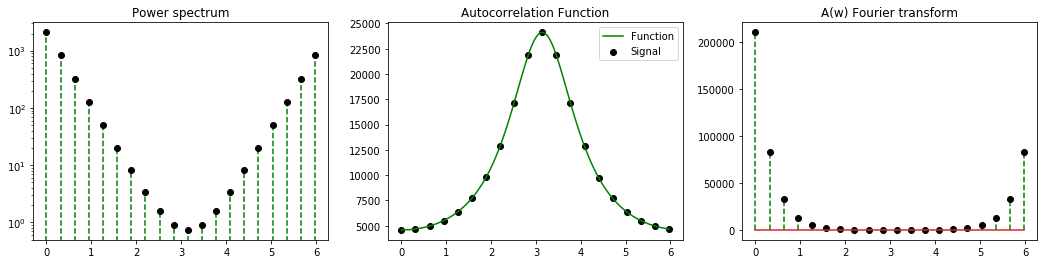

In [223]:
T = 2*np.pi
w = 2*np.pi/T
N = 20
t = np.linspace(0,T,N,endpoint=False)
t0 = np.linspace(t.min(),t.max(),100)

signal = f1(t,w)
signal0 = f1(t0,w)
A = ACF(f1,t,w)
A0 = ACF(f1,t0,w)
F = DFT(signal)
PS = F**2
S = DFT(A)

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.stem(t,PS,linefmt='g--', markerfmt='ko',use_line_collection=True)
plt.semilogy()
plt.title('Power spectrum')
plt.subplot(1,3,2)
plt.scatter(t,A,c='k',label='Signal')
plt.plot(t0,A0,c='g',label='Function')
plt.legend()
plt.title('Autocorrelation Function')
plt.subplot(1,3,3)
plt.stem(t,S,linefmt='g--', markerfmt='ko',use_line_collection=True)
plt.title('A(w) Fourier transform')
plt.savefig('potencias.png')

In [243]:
N = 50
t = np.linspace(0,T,N,endpoint=False)
signal = np.zeros(N)
for n in range(N):
    signal[n] = f2(t[n],w)
signal0 = np.zeros(len(t0))
for n in range(len(t0)):
    signal0[n] = f2(t0[n],w)
A = ACF(f2,t,w)
A0 = ACF(f2,t0,w)
F = DFT(signal)
PS = F**2
S1 = np.sqrt(2*np.pi)*F**2
S2 = DFT(A)

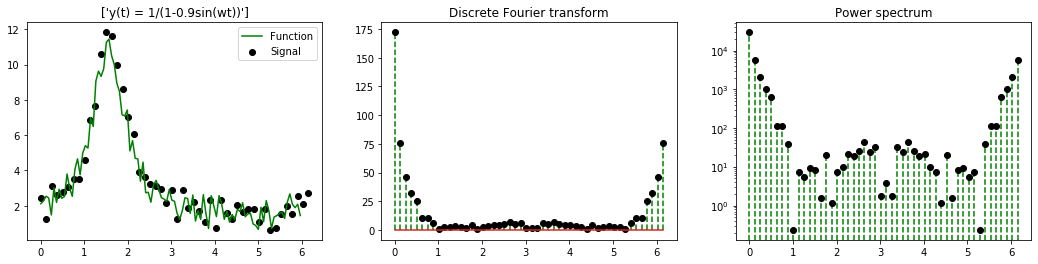

In [244]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.scatter(t,signal,c='k',label='Signal')
plt.plot(t0,signal0,c='g',label='Function')
plt.legend()
plt.title(title)
plt.subplot(1,3,2)
plt.stem(t,F,linefmt='g--', markerfmt='ko',use_line_collection=True)
plt.title('Discrete Fourier transform')
plt.subplot(1,3,3)
plt.stem(t,PS,linefmt='g--', markerfmt='ko',use_line_collection=True)
plt.semilogy()
plt.title('Power spectrum')
plt.savefig('ruido.png')

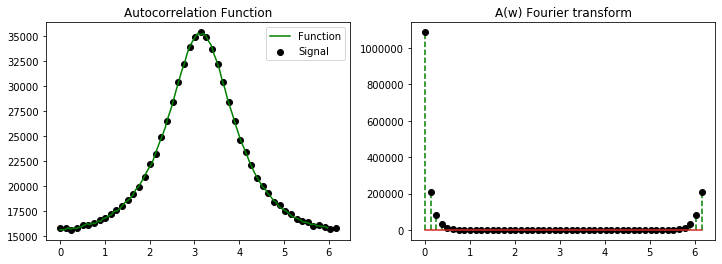

In [245]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(t,A,c='k',label='Signal')
plt.plot(t0,A0,c='g',label='Function')
plt.legend()
plt.title('Autocorrelation Function')
plt.subplot(1,2,2)
plt.stem(t,S2,linefmt='g--', markerfmt='ko',use_line_collection=True)
plt.title('A(w) Fourier transform')
plt.savefig('correlacion.png')

Al hallar la transformada de la función de autocorrelación se ven con más claridad los pulsos de la señal


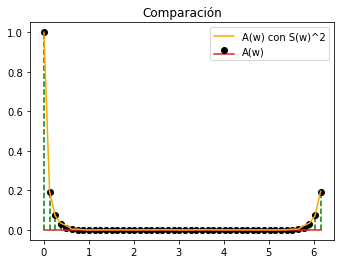

In [246]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.stem(t,S2/S2.max(),linefmt='g--', markerfmt='ko',use_line_collection=True,label='A(w)')
plt.plot(t,S1/S1.max(),c='orange',label='A(w) con S(w)^2')
plt.legend()
plt.title('Comparación')
plt.savefig('comparación.png')
print('Al hallar la transformada de la función de autocorrelación se ven con más claridad los pulsos de la señal')

In [250]:
signal = np.zeros(N)
for n in range(N):
    signal[n] = f2(t[n],w,50)
signal0 = np.zeros(len(t0))
for n in range(len(t0)):
    signal0[n] = f2(t0[n],w,50)
A = ACF(f2,t,w)
A0 = ACF(f2,t0,w)
F = DFT(signal)
PS = F**2
S1 = np.sqrt(2*np.pi)*F**2
S2 = DFT(A)

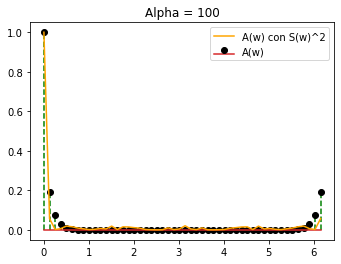

In [252]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.stem(t,S2/S2.max(),linefmt='g--', markerfmt='ko',use_line_collection=True,label='A(w)')
plt.plot(t,S1/S1.max(),c='orange',label='A(w) con S(w)^2')
plt.legend()
plt.title('Alpha = 100')
plt.savefig('alpha.png')